In [1]:
import tensorflow as tf
from keras.datasets import mnist

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(-1, 784) / 255.
X_test = X_test.reshape(-1, 784) / 255.

In [3]:
autoencoder_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_model.fit(X_train, X_train, epochs=5, batch_size=256, validation_data=(X_test, X_test), verbose=0)

reconstructed_images = autoencoder_model.predict(X_test, verbose=0)

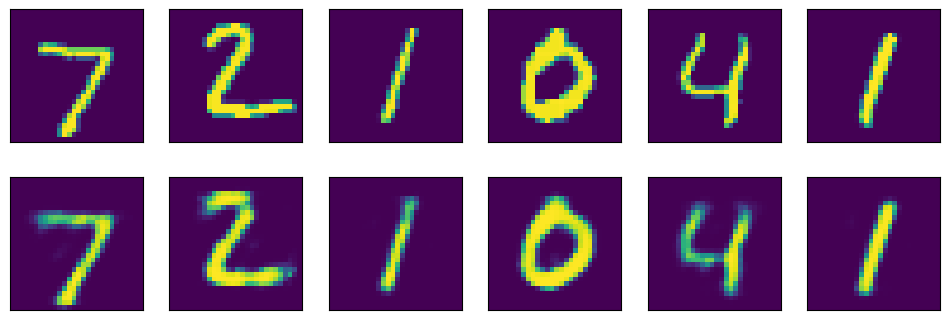

In [4]:
import matplotlib.pyplot as plt

n = 6
plt.figure(figsize=(12, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1,)
    plt.imshow(X_test[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n,)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
